In [0]:
import numpy as np
import torch

import matplotlib.pyplot  as plt
%matplotlib inline

## Aufgabe 1a)

 ## Likelihood
- First, run the following code. It will generate a dataset of samples from a categorical distribution where $x\in\{1,...,100\}$. 
- Take the first 80\% of the samples as a training set and the remaining 20\% as a test set.

In [0]:
def sample_data():
  count = 10000
  rand = np.random.RandomState(0)
  a = 0.3 + 0.1 * rand.randn(count)
  b = 0.8 + 0.05 * rand.randn(count)
  mask = rand.rand(count) < 0.5
  samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
  return np.digitize(samples, np.linspace(0.0, 1.0, 100))

sample_data = sample_data()

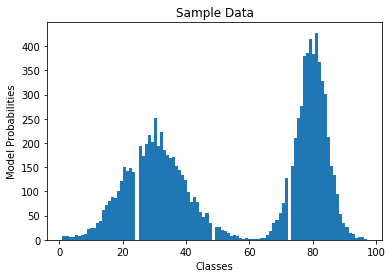

In [3]:
plt.hist(sample_data, bins=100)

plt.xlabel('Classes')
plt.ylabel('Model Probabilities')
plt.title('Sample Data')
plt.show()

In [4]:
x_train = sample_data[:8000]
x_test = sample_data[8000:]
print("train shape: ", x_train.shape)
print("test shape: ", x_test.shape)
print("Example of 10 inputs:", x_train[0:10])

train shape:  (8000,)
test shape:  (2000,)
Example of 10 inputs: [48 76 88 81 79 21 85 87 29 77]


In [0]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, target, transform=None):
      self.target = torch.from_numpy(target).long()
      self.transform = transform
      
  def __getitem__(self, index):
      y = self.target[index]
      
      if self.transform:
          y = self.transform(y)
          
      return y
  
  def __len__(self):
      return len(self.target)

In [0]:
BATCHSIZE = 100

In [0]:
train_ds = MyDataset(x_train)
test_ds = MyDataset(x_test)

train_ds = torch.utils.data.DataLoader(train_ds, batch_size=BATCHSIZE)
test_ds = torch.utils.data.DataLoader(test_ds, batch_size=BATCHSIZE)

## Model

- Let $\theta=(\theta_1,...,\theta_{100})\in \Re^{100}$, and define the model
$$
p_{\theta}(x)=\frac{e^{\theta x} }{\sum_{x'}e^{\theta x'}}
$$



In [0]:
class P_theta(torch.nn.Module):
  def __init__(self):
      super().__init__()
      self.theta = torch.nn.parameter.Parameter(torch.zeros(100, requires_grad=True))
  
  def forward(self, bs):
      return self.theta.repeat(bs, 1)

In [0]:
p_theta = P_theta()
optimizer = torch.optim.SGD(p_theta.parameters(), lr=0.05)

### Train the Model

In [10]:
EPOCH = 10
train_loss_list = []
for epoch in range(EPOCH):
  for i, labels in enumerate(train_ds, 0):
    # print("Labels:", labels.shape)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = p_theta(labels.size(0))

    loss = torch.nn.functional.cross_entropy(outputs, labels)

    # if want to compute the loss by hand:
    # labels = torch.nn.functional.one_hot(labels, 100)
    # loss = - torch.mean(  torch.sum(outputs * labels,1) -  torch.log(  torch.sum(torch.exp(outputs) ,1) ))
    
    loss_bit = np.log2(np.exp(loss.item()))
    loss.backward()
    optimizer.step()

    # print statistics
    if (i % 20 == 0):
      print("epoch: ", epoch, "i:" , i, "loss: ", loss_bit)
    train_loss_list.append(loss_bit)

epoch:  0 i: 0 loss:  6.643849402730298
epoch:  0 i: 20 loss:  6.627691288716436
epoch:  0 i: 40 loss:  6.614130112730601
epoch:  0 i: 60 loss:  6.5894155178710125
epoch:  1 i: 0 loss:  6.5722385786334385
epoch:  1 i: 20 loss:  6.565471405287289
epoch:  1 i: 40 loss:  6.559855139840713
epoch:  1 i: 60 loss:  6.521818768845291
epoch:  2 i: 0 loss:  6.506203432077551
epoch:  2 i: 20 loss:  6.508434391024544
epoch:  2 i: 40 loss:  6.510459658721103
epoch:  2 i: 60 loss:  6.459673181921317
epoch:  3 i: 0 loss:  6.445563725244532
epoch:  3 i: 20 loss:  6.456370427094147
epoch:  3 i: 40 loss:  6.465733162607118
epoch:  3 i: 60 loss:  6.402773065848658
epoch:  4 i: 0 loss:  6.390089689312827
epoch:  4 i: 20 loss:  6.409023603311616
epoch:  4 i: 40 loss:  6.425432124065135
epoch:  4 i: 60 loss:  6.350855631136797
epoch:  5 i: 0 loss:  6.339521974444938
epoch:  5 i: 20 loss:  6.366115995713155
epoch:  5 i: 40 loss:  6.3892834346455825
epoch:  5 i: 60 loss:  6.303634010724093
epoch:  6 i: 0 loss

Train loss: 


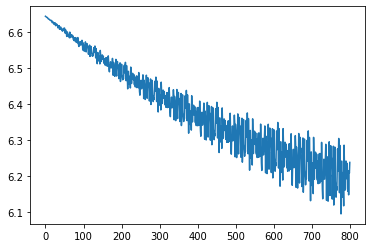

In [11]:
print("Train loss: ")
plt.plot(train_loss_list)
plt.show()

## Test The Model

In [12]:
test_loss_list = []
for i, labels in enumerate(test_ds, 0):
  
  outputs = p_theta(labels.size(0))

  loss = torch.nn.functional.cross_entropy(outputs, labels)
  loss_bit = np.log2(np.exp(loss.item()))

  # print statistics
  print(i, ": loss ", loss.item())
  test_loss_list.append(loss)

0 : loss  4.32619571685791
1 : loss  4.251819610595703
2 : loss  4.298064708709717
3 : loss  4.296680927276611
4 : loss  4.269058704376221
5 : loss  4.280087471008301
6 : loss  4.296474456787109
7 : loss  4.230045795440674
8 : loss  4.280022144317627
9 : loss  4.290212154388428
10 : loss  4.272128105163574
11 : loss  4.287589073181152
12 : loss  4.235363006591797
13 : loss  4.2804670333862305
14 : loss  4.344542980194092
15 : loss  4.335600852966309
16 : loss  4.323179244995117
17 : loss  4.277219772338867
18 : loss  4.3183794021606445
19 : loss  4.289189338684082


Test loss:


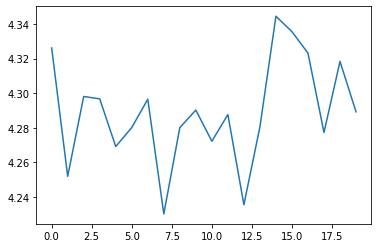

In [13]:
print("Test loss:")
plt.plot(test_loss_list)
plt.show()

## Aufgabe 1b)

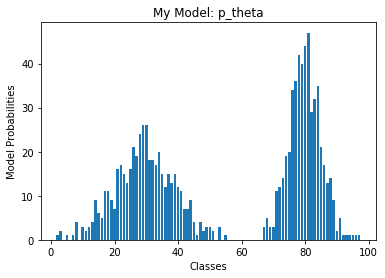

In [14]:
x = np.arange(1,101)
samples = sample_data[0:1000]
unique, count = np.unique(samples, return_counts=True)

plt.bar(unique , count)
plt.xlabel('Classes')
plt.ylabel('Model Probabilities')
plt.title('My Model: p_theta')
plt.show()

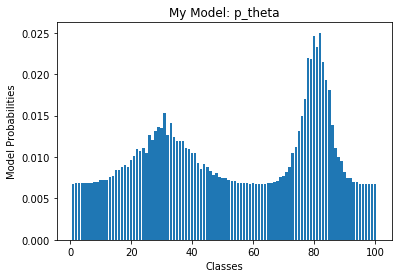

In [15]:
x = np.arange(1,101)
theta = p_theta.theta.detach().numpy()
y = np.exp(theta) / np.sum(np.exp(theta))

plt.bar(x , y)
plt.xlabel('Classes')
plt.ylabel('Model Probabilities')
plt.title('My Model: p_theta')
plt.show()